# Baseball Case Study

### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Complete Game,Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print("import complete")

import complete


In [2]:
# Loading the dataset 

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")  
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Exploratory Data Analysis

Firstly, will be proceeding with exploratory data analysis and will be analyzing the following:
- General info about the dataset
- missing values 
- analyzing types of variables
  - numerical variables
  - categorical if any
- visualisation 
- detecting outliers
- distributions of variables
- relationship between independent and dependent features

In [3]:
# checking shape of dataset
data.shape

(30, 17)

In [4]:
# checking info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Out of 17 variables only one variable is float rest are integer type;

16 int type, 1 float type

All of them are numerical variables

In [5]:
# checking column names 
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# checking for any missing values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing values in the dataset

In [7]:
# checking statistical summary
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above table Complete Games, Shutouts looks like discrete variables also looks like some variables have outliers 

In [8]:
# Finding correlation between the variables
correlation = data.corr()
correlation

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [9]:
# since wins is the target variable let's check the correlation of other variables with it
# arranging in the order of highest to lowest
correlation.W.sort_values(ascending=False).drop('W')

SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Wins are strongly positively correlated to Saves and walks and strongly negatively correlated to Runs allowed and Earned runs average.

Analysing types of numerical variables 
- Continous
- Discrete

- Discrete Variables

In [10]:
#finding discrete variables
discrete_var = [var for var in data.columns if len(data[var].unique())<15]
discrete_var

['CG', 'SHO']

Complete Games and Shutouts are discrete variables

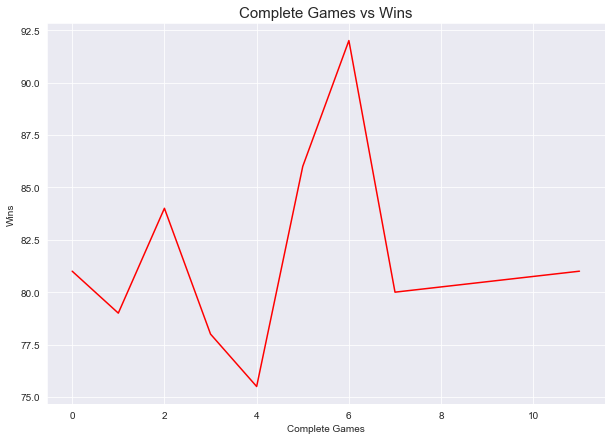

In [11]:
# Relationship between Complete games and wins
plt.figure(figsize=(10,7))
data.groupby('CG')['W'].median().plot(kind='line',color='r')
plt.title("Complete Games vs Wins",fontsize=15)
plt.xlabel("Complete Games")
plt.ylabel("Wins")
plt.show()

There is no specific relation between Complete Games and wins
- Although there was a significant increase in wins when a player had complete games between 4-6
- Also there was a downfall after 6 complete games

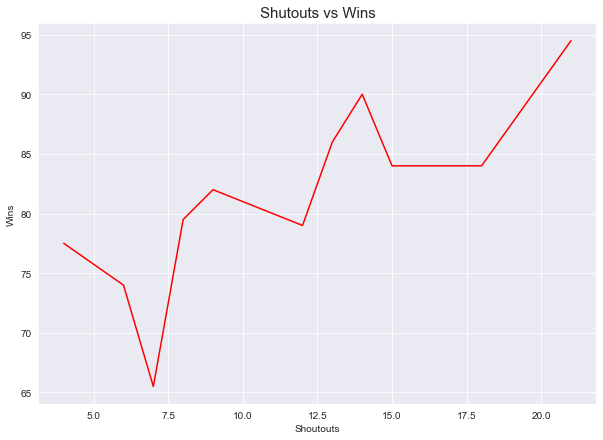

In [12]:
# Relationship between Complete games and wins
plt.figure(figsize=(10,7))
data.groupby('SHO')['W'].median().plot(kind='line',color='r')
plt.title("Shutouts vs Wins",fontsize=15)
plt.xlabel("Shoutouts")
plt.ylabel("Wins")
plt.show()

- From the above lot can infer that SHO is pretty much contributing to the no of wins; because with increase in shutouts there is an increase in wins
- Athough there are some downfalls in wins in between as per the plot but overall it is one good factor for wins.

- Continous variables

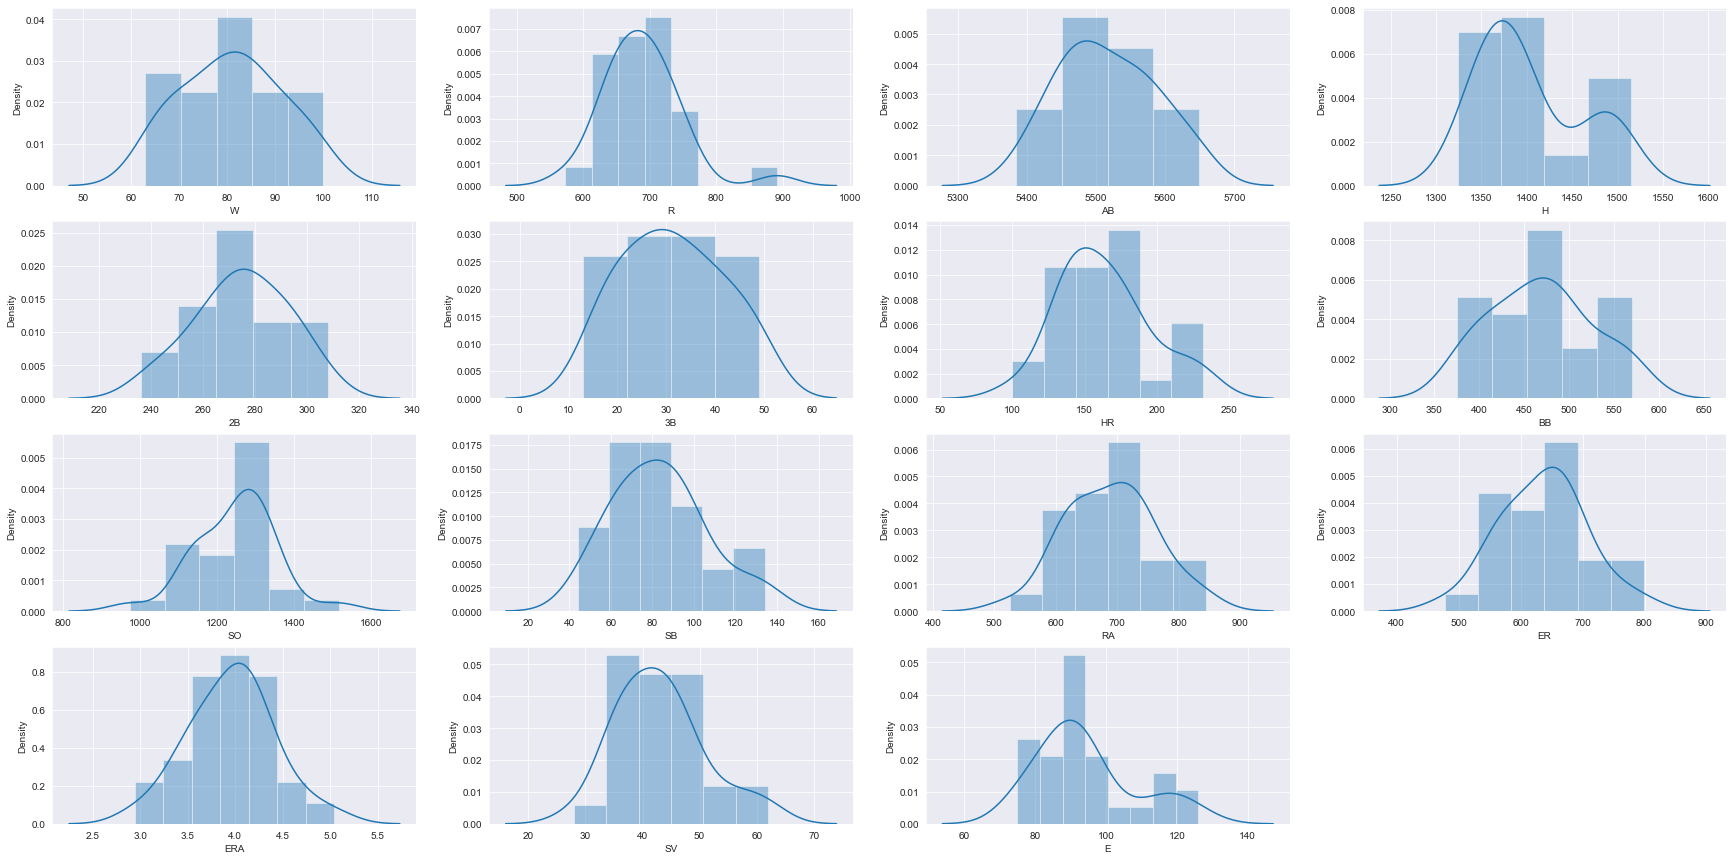

In [13]:
# Analysing distribution of Continous variables
continuous_var=[ var for var in data.columns if var not in discrete_var]
plot = 1
plt.figure(figsize=(30,15))
for var in continuous_var:
    plt.subplot(4,4,plot)
    sns.distplot(data[var])
    plot +=1
plt.show()

From the above plot we can see that many variables are not normally distributed so for that we have to transform them into gaussian distribution for good predictions.

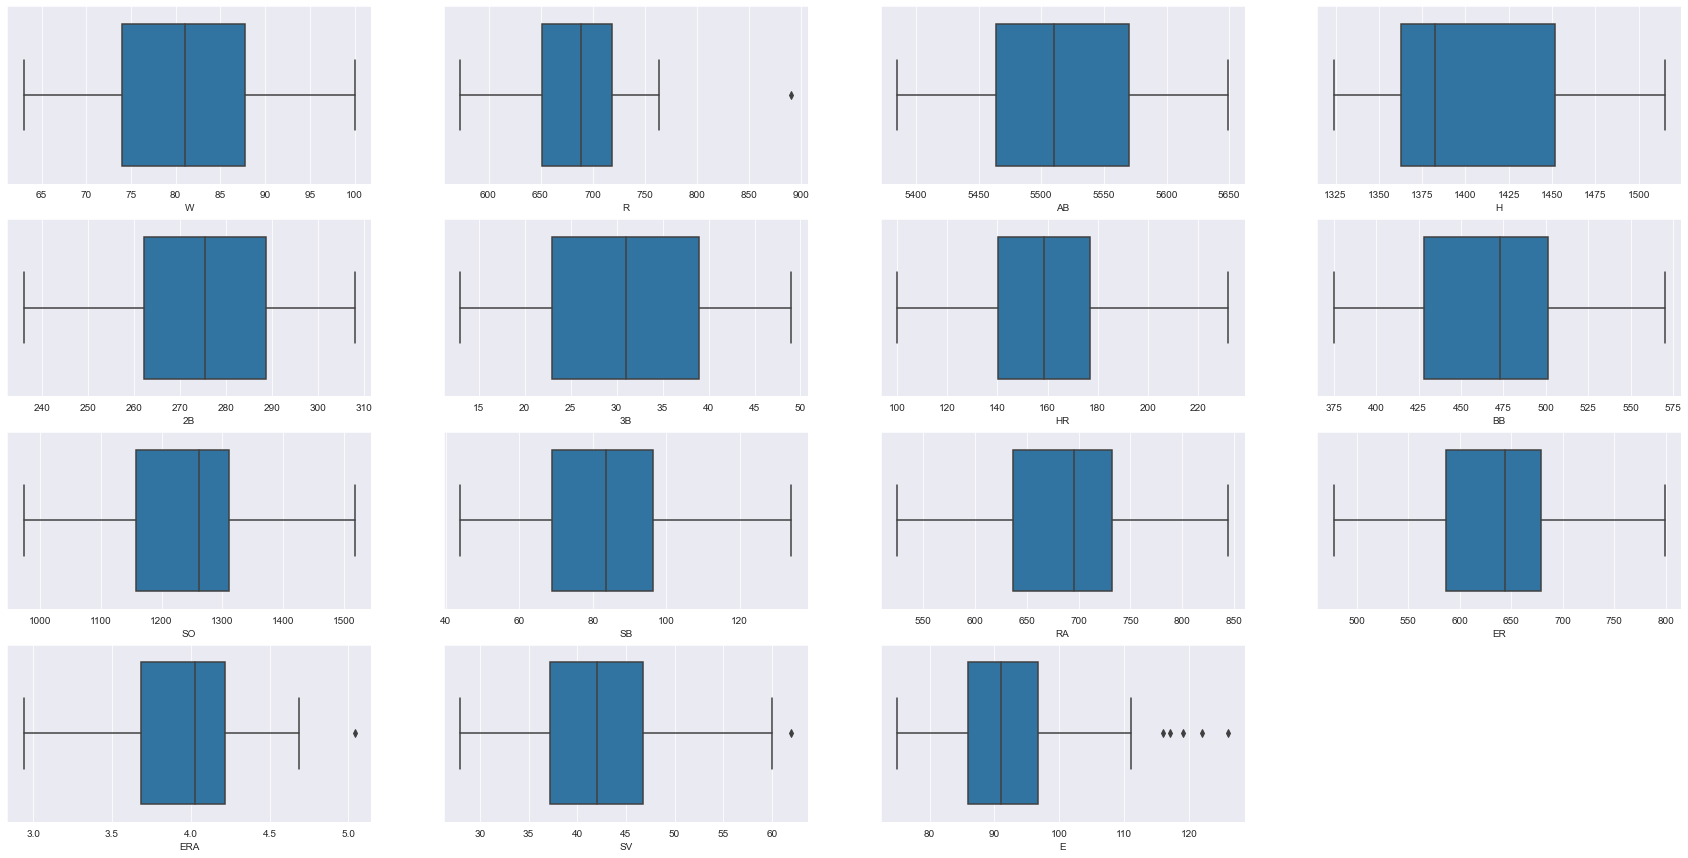

In [14]:
# Analysing outliers in Continous variables
continuous_var=[ var for var in data.columns if var not in discrete_var]
plot = 1
plt.figure(figsize=(30,15))
for var in continuous_var:
    plt.subplot(4,4,plot)
    sns.boxplot(data[var])
    plot +=1
plt.show()

From above plot we can see that Runs, ERA , Saves and Error are having some of outliers.
Will be replacing the outliers with the median since dataset is very small.

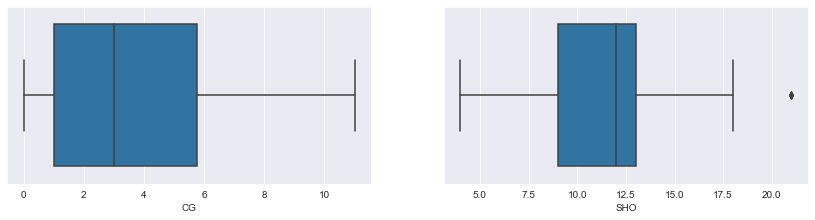

In [15]:
# Analysing outliers in Discrete variables
plot = 1
plt.figure(figsize=(30,15))
for var in discrete_var:
    plt.subplot(4,4,plot)
    sns.boxplot(data[var])
    plot +=1
plt.show()

Shutouts variable has outlier which we will replace by median

#### Visualisation 
- Will be visualising the relationships between feature and target variables
- Will be visualising different trends for wins in baseball games

No specifc relation between hits and wins which means both have low correlation.

Can see some amount of relationship between Double and wins which shows some dependency of wins over doubles

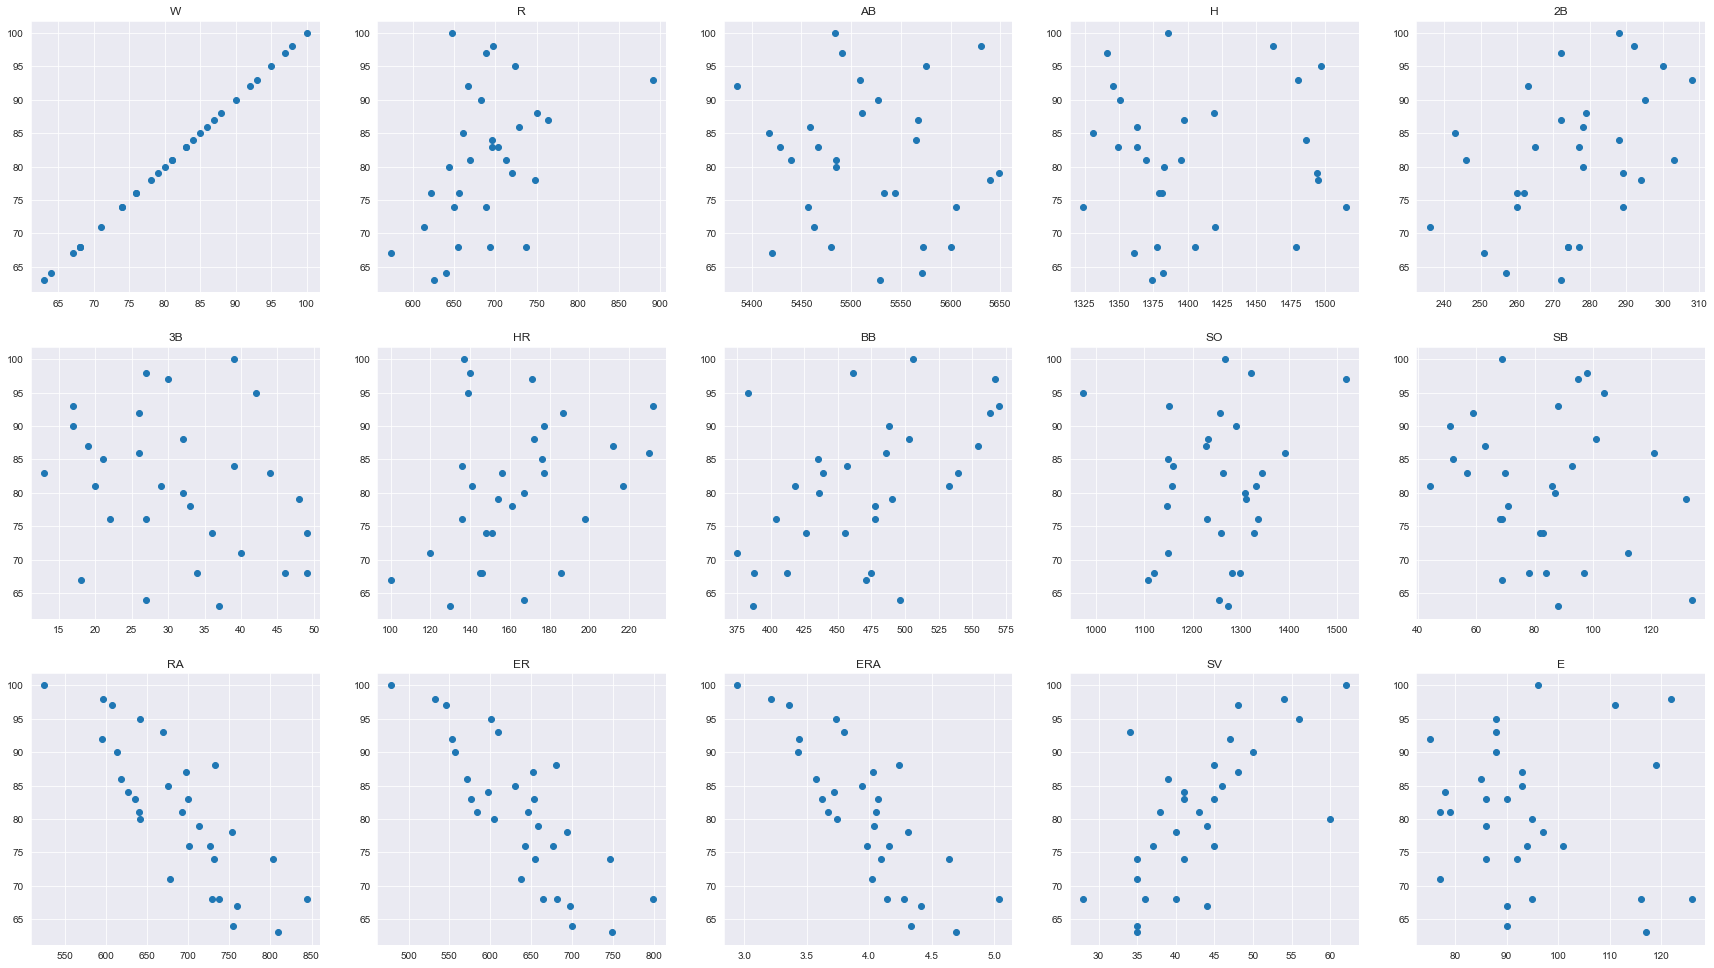

In [16]:
plot=1
plt.figure(figsize=(30,17))
for var in continuous_var:
    plt.subplot(3,5,plot)
    plt.scatter(data[var],data['W'])
    plt.title(var)
    plot+=1
plt.show()

Observations :

- There is linear relation in runs,saves and wins increase in runs would result increase in       wins
    
- From the above relation we can infer that there is not any specific relation between           features At Bat, Hits, Triples, Stolen base, Error and target wins, i.e. increase in           wins have less dependency on these features.
    
- Doubles, Homeruns , Walk , Strikeouts have some amount of linear relationship with wins,       i.e. they can contribute in no. of wins
    
- Runs Allowed, Earned runs, Earned runs average are negatively correlated to no of wins.

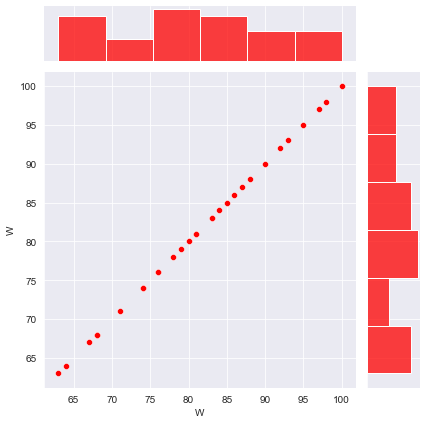

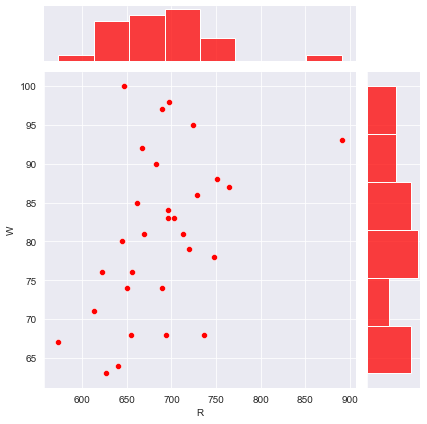

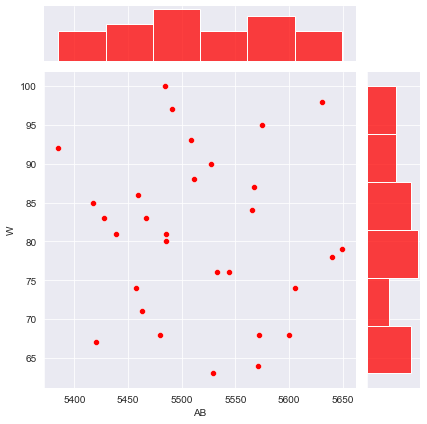

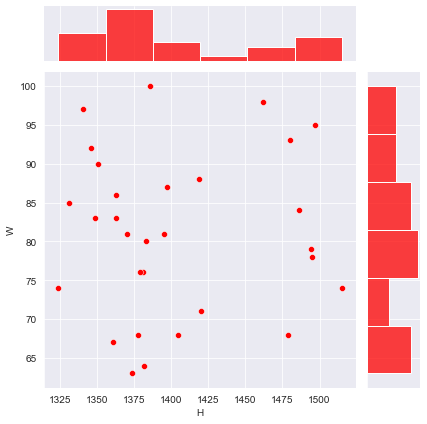

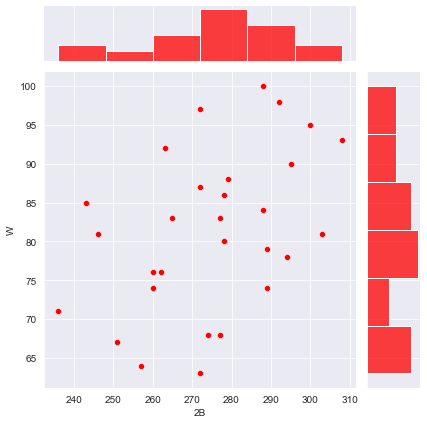

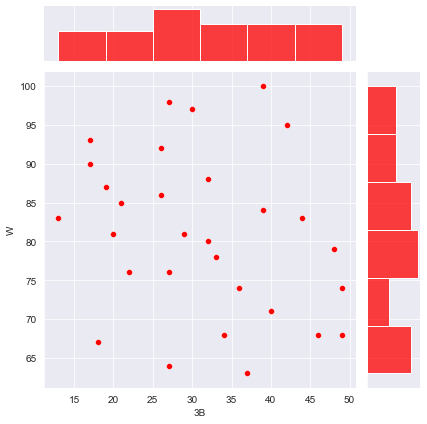

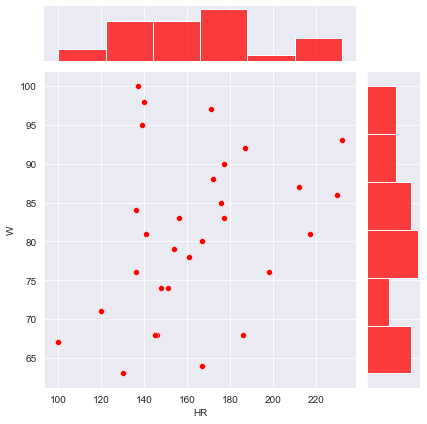

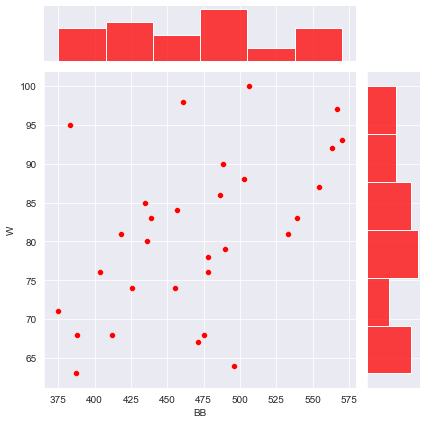

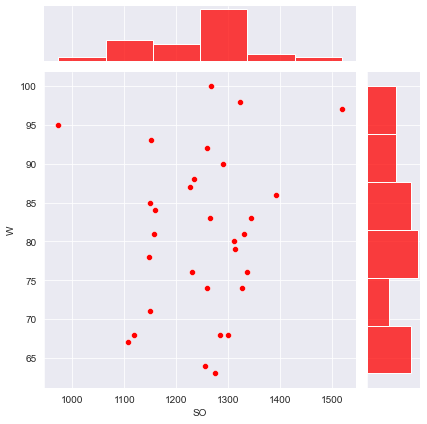

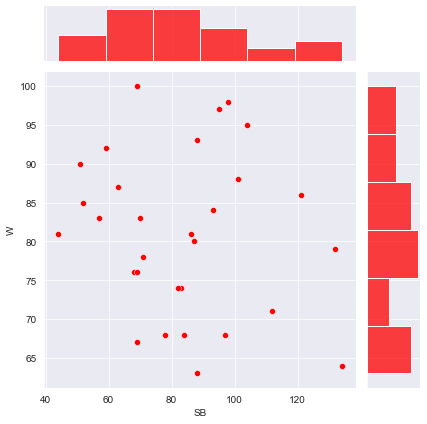

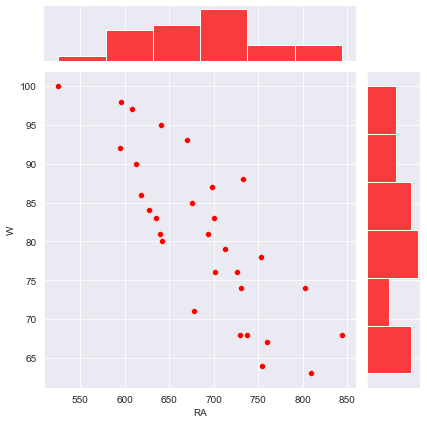

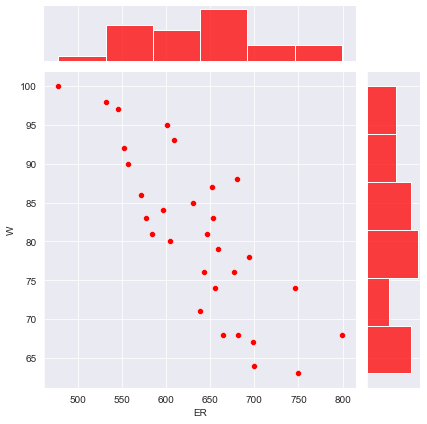

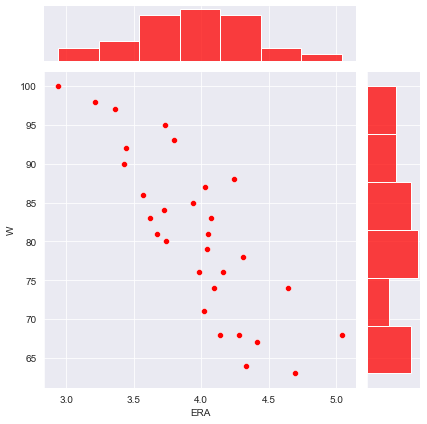

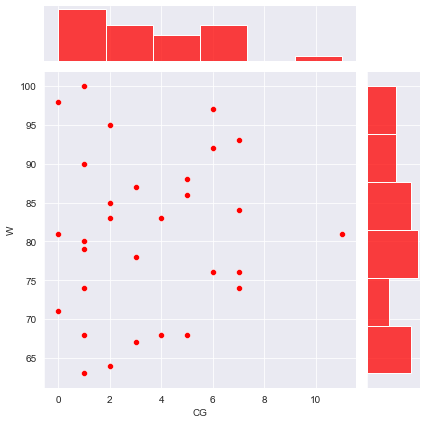

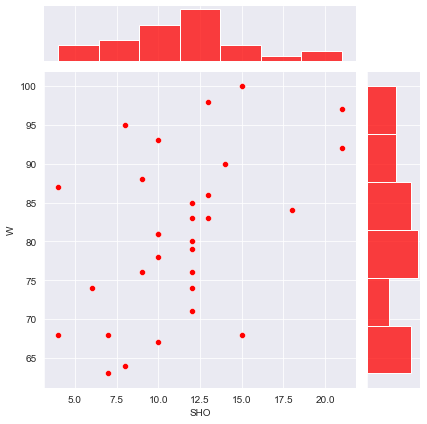

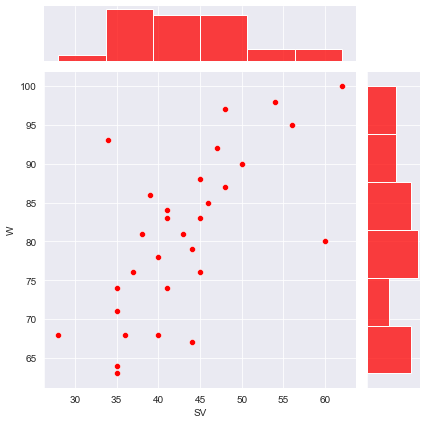

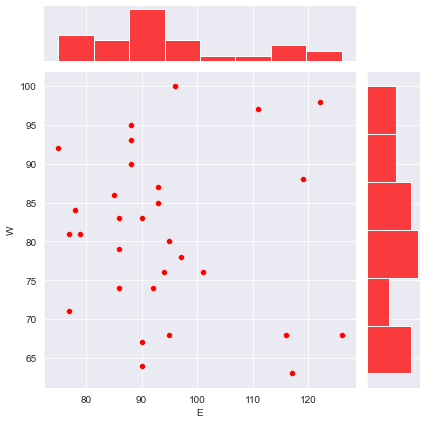

In [17]:
#checking distribution relation between the variables
for var in data.columns:
    sns.jointplot(x=data[var],y=data['W'],data=data,color='r')
plt.show()

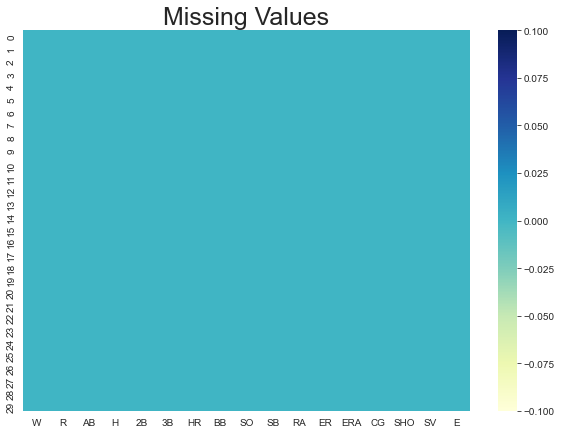

In [18]:
# Visualising missing values in the dataset
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(data.isnull(),cmap='YlGnBu')
plt.show()

From the above plot we can infer that dataset has no missing values.

<AxesSubplot:title={'center':'Correlation between variables'}>

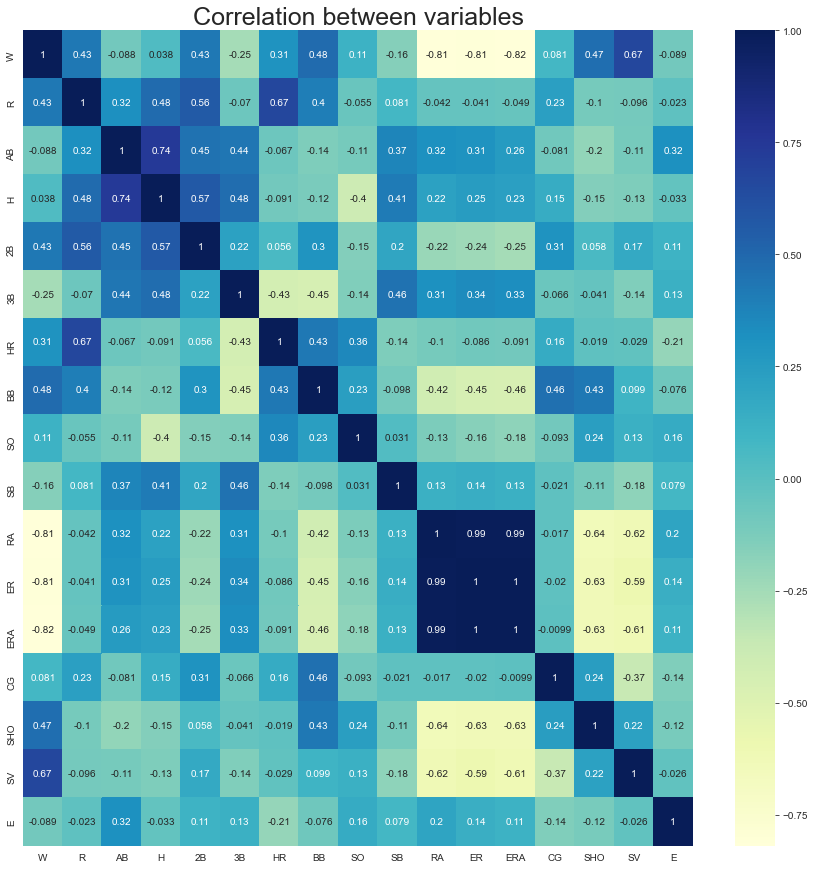

In [19]:
# visualising Correlation throug heatmap
plt.figure(figsize=(15,15))
plt.title("Correlation between variables",fontsize=25)
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

observations:
    
- Saves is the highest correlated feature with wins i.e more saves more wins.
- Runs, walks and shutouts are also positively correlated with wins.
- Runs allowed, Earned Runs, Earned Runs average are highly negatively correlated with no of wins.
- Also some feature variables are correlated to each other, i.e. if all of them are taken consideration they won't make much change means they will have somewhat same weightage so we can drop some of them for further predictions.
- The features corelated to each other are (ER,RA) , (ERA,RA) , (ERA,ER) we can drop some of these features in further feature engineering process.


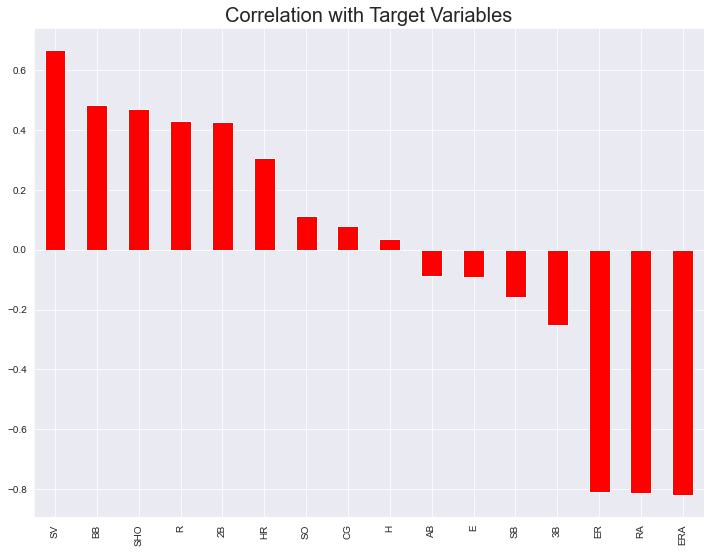

In [20]:
# will be plotting correlation with respect to target variable "wins"
plt.figure(figsize=(12,9))
plt.title("Correlation with Target Variables",fontsize=20)
correlation.W.sort_values(ascending=False).drop(['W']).plot.bar(color='r')
plt.show()

Saves is highly positively correlated and ER, ERA, RA have somewhat equal high negative correlation.

### Feature Engineering

Will be proceeding with Feature Engineering:

Feature engineering basically focuses on:

- Imputation of missing values : Since we don't have missing values we won't have to perform this step
- Treating outliers : R, ERA, SV, E, SHO have outliers will be treating them
- Transformation : Transforming the not normally distributed variables
- Scaling : Normalisation or Standardisation

#### Treating Outliers

In [21]:
# defining a function to find the lower and upper bound 
def outliers(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    outliers_step = 1.5*IQR 
    
    lower = Q1 - outliers_step
    upper = Q3 + outliers_step
    return lower,upper

In [22]:
dataset = data.copy()
outlier_cols=['R','SV','E','SHO']
for i in outlier_cols:
    lower_bound,upper_bound=outliers(dataset,outlier_cols)
    dataset[outlier_cols]=np.where(dataset[outlier_cols]<lower_bound,lower_bound,dataset[outlier_cols])
    dataset[outlier_cols]=np.where(dataset[outlier_cols]>upper_bound,upper_bound,dataset[outlier_cols])

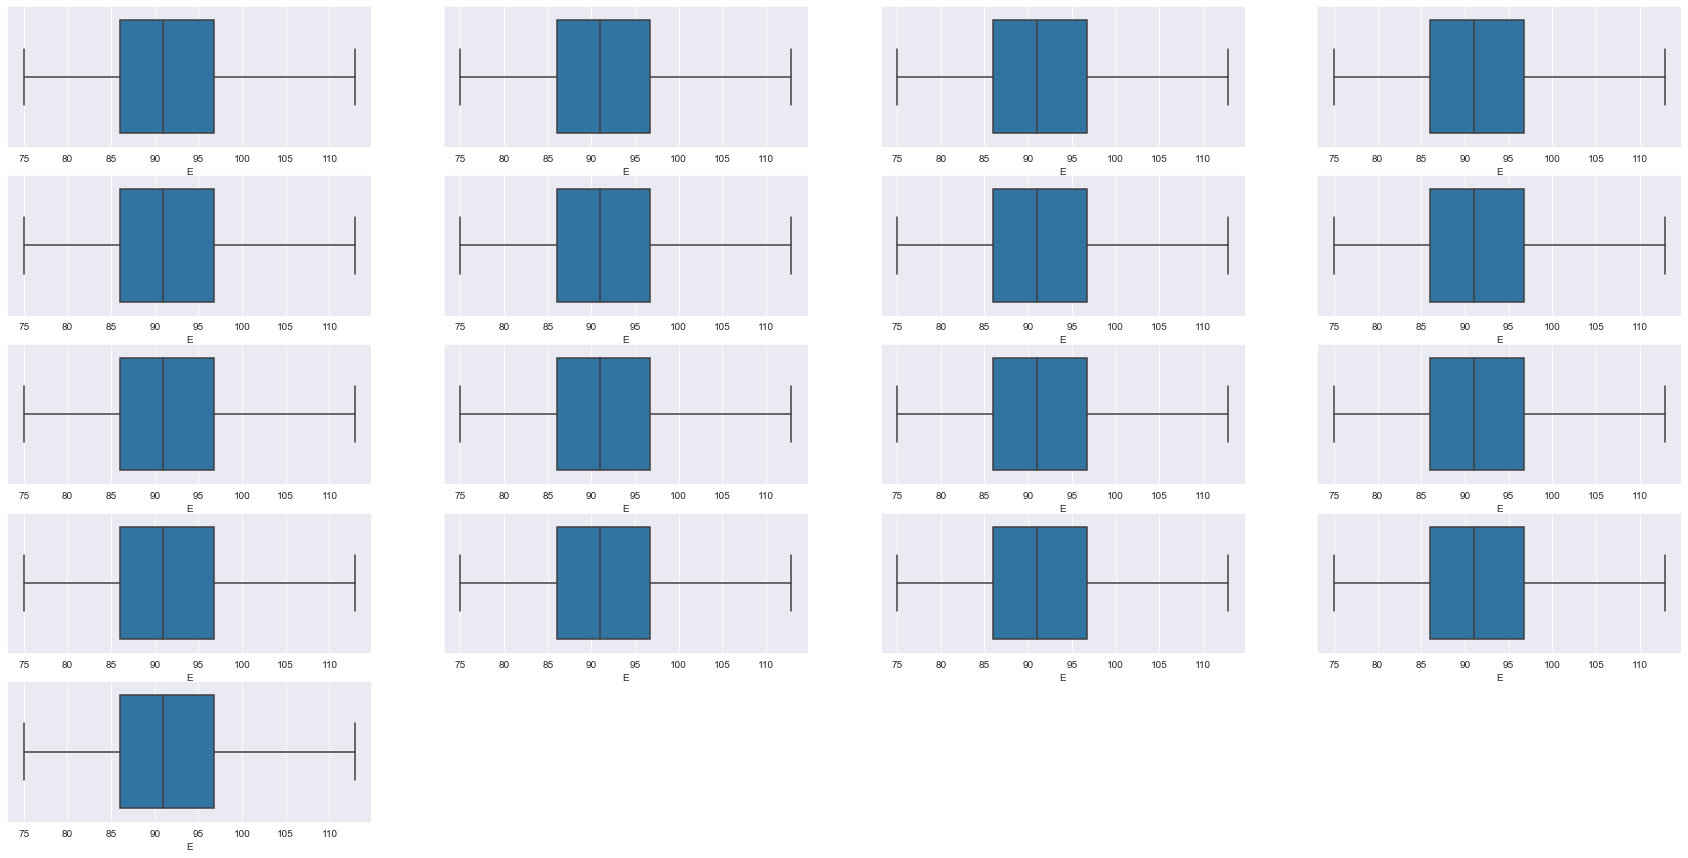

In [23]:
plot = 1
plt.figure(figsize=(30,15))
for i in dataset.columns:
    plt.subplot(5,4,plot)
    sns.boxplot(dataset[var])
    plot +=1
plt.show()

#### Transformation 

- Will be checking the gaussian distribution of the variables using histograms and Q-Q plot
- Will be checking the skewness
- Will be applying different transformations to normalise the variables

In [24]:
# function to plot distribution and Q_Q plot
import scipy.stats as stat
import pylab
def plot_data(df,var):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[var].hist()
    plt.xlabel(var)
    plt.subplot(1,2,2)
    stat.probplot(df[var],dist='norm',plot=pylab)

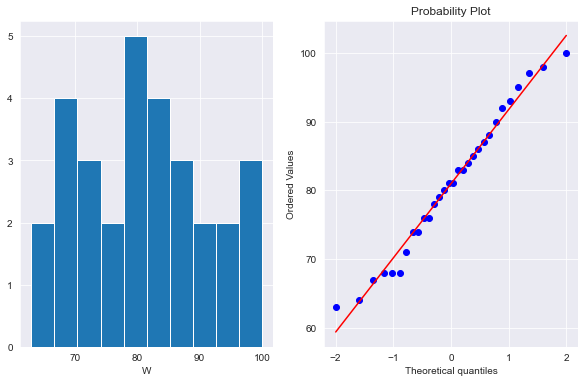

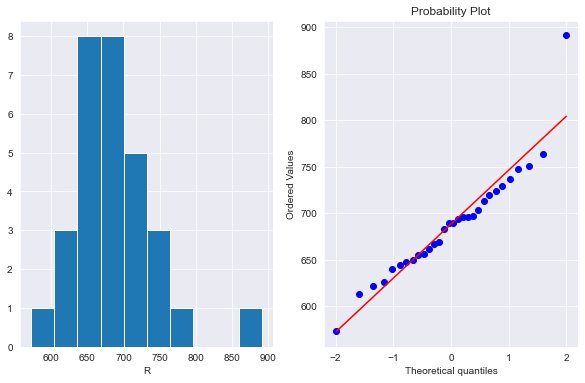

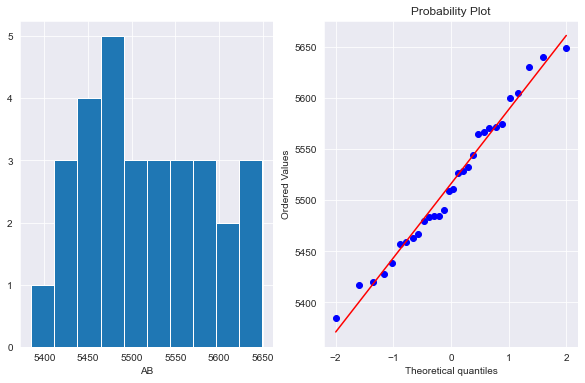

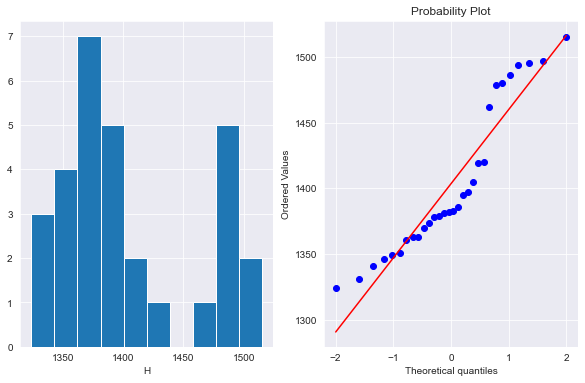

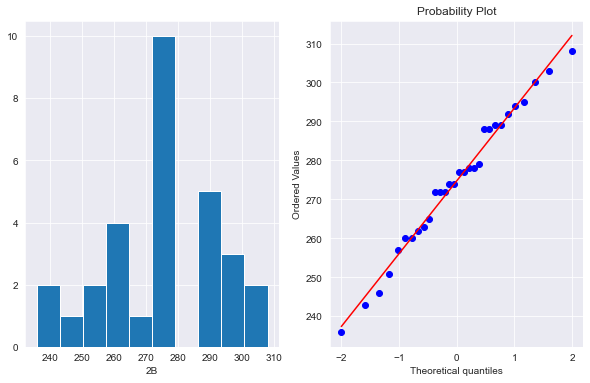

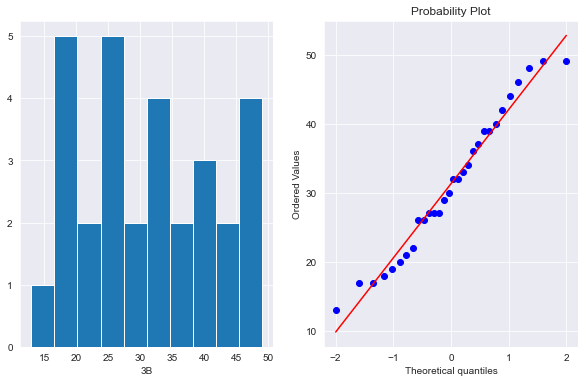

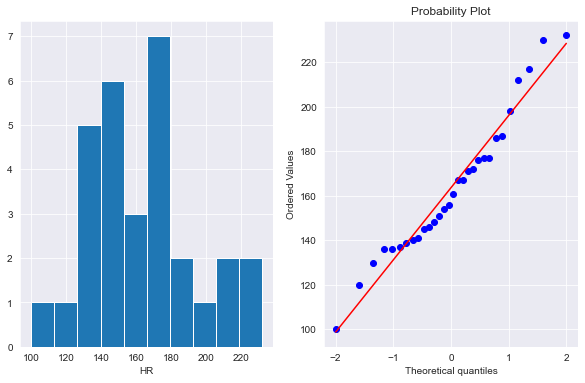

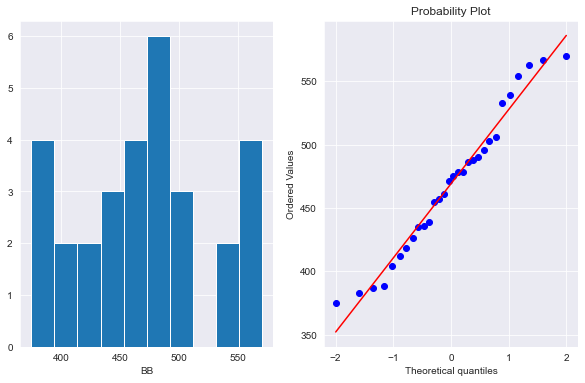

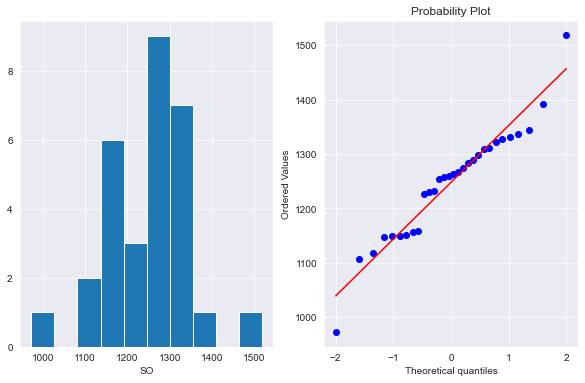

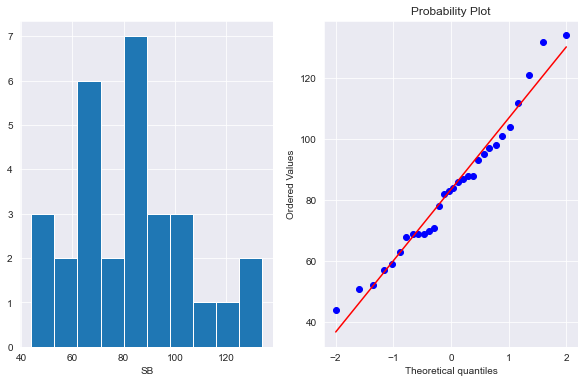

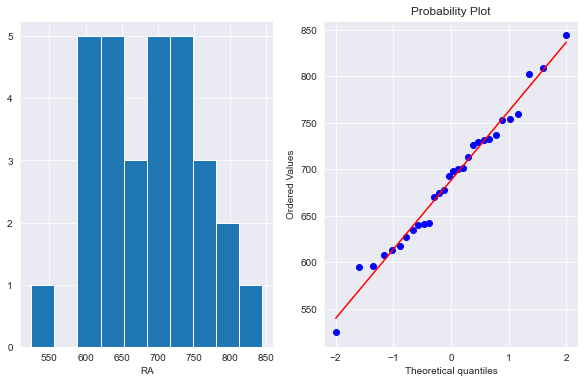

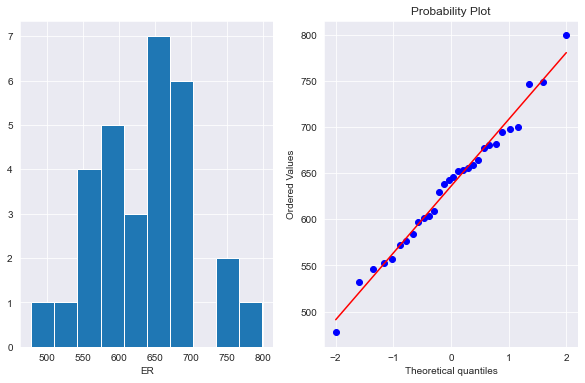

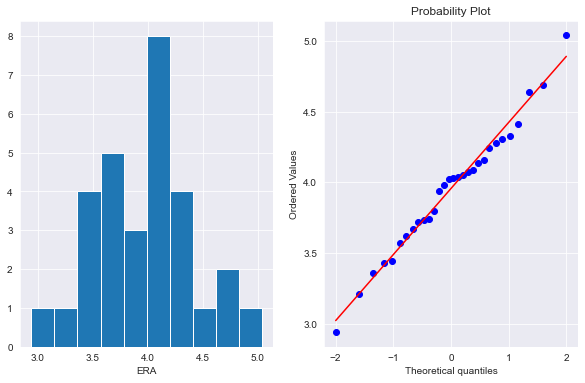

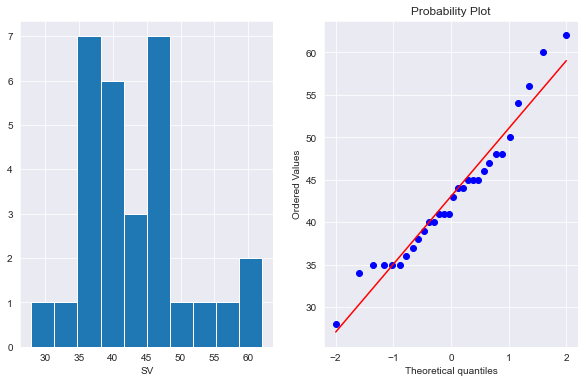

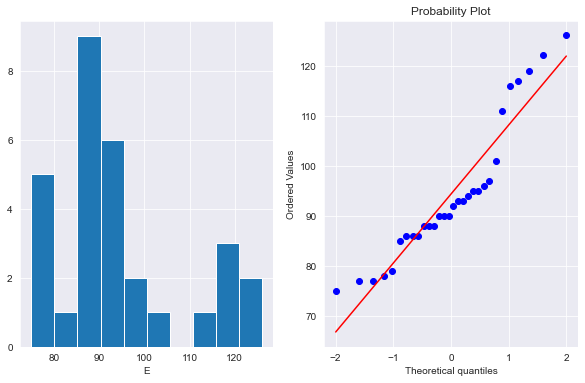

In [25]:
for var in continuous_var:
    plot_data(data,var)
plt.show()

In the above plots we can see the distribution of data with the help of histogram and the Q-Q plot indicates if the data is normally distributed or not.
If the values follow the straight lines the data is normally distributed else it is not.

- R, H, HR, SV, E are some variables which are not normally distributed.

Will further check skewness of the continous variables

In [26]:
#checking the skewness of dataset

dataset[continuous_var].skew()

W      0.047089
R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
SV     0.612333
E      0.504019
dtype: float64

Since there is skewness as well as Q_Q plot shows not normal distribution in variables R,H,SV,E will transform the data to normalised form using different transformation techniques.

In [27]:
# Normalising Runs variable

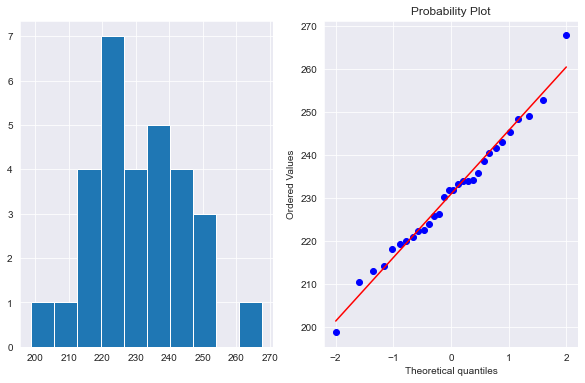

In [28]:
# exponential transformation
dataset.R=dataset.R**(1/1.2)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.R.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.R,dist='norm',plot=pylab)
plt.show()

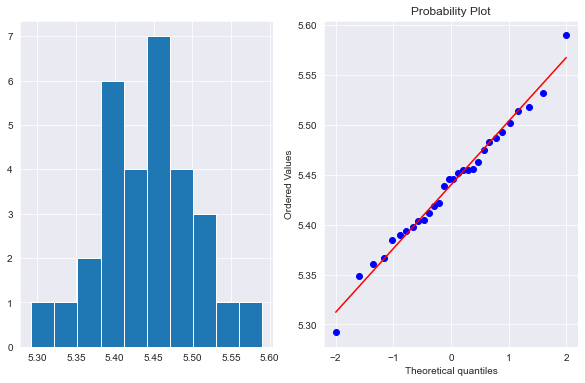

In [29]:
# log transformation
dataset.R=np.log(dataset.R)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.R.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.R,dist='norm',plot=pylab)
plt.show()

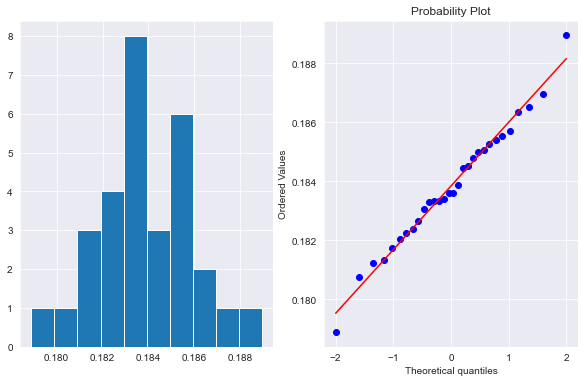

In [30]:
# Reciprocal Transformation
dataset.R=1/(dataset.R)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.R.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.R,dist='norm',plot=pylab)
plt.show()

In [31]:
# Normalisisng Hits variable

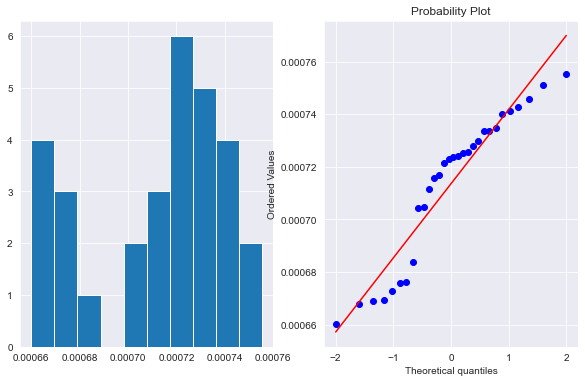

In [32]:
# reciprocal transformation
dataset.H=1/(dataset.H)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.H.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.H,dist='norm',plot=pylab)
plt.show()

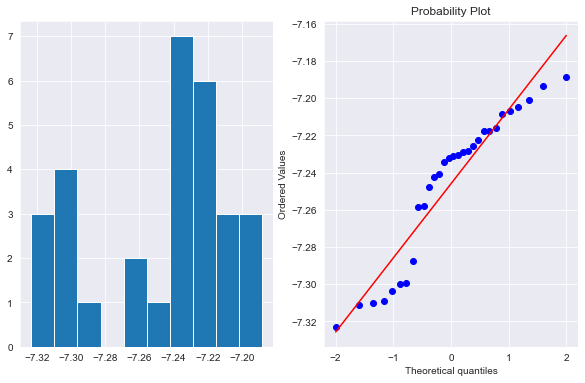

In [33]:
#log transformation
dataset.H=np.log(dataset.H)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.H.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.H,dist='norm',plot=pylab)
plt.show()

In [34]:
# normalising Saves SV

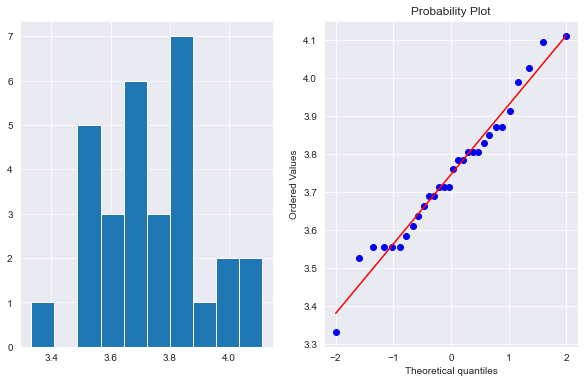

In [35]:
# log transformation
dataset.SV = np.log(dataset.SV)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.SV.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.SV,dist='norm',plot=pylab)
plt.show()

In [36]:
# normalising Error E

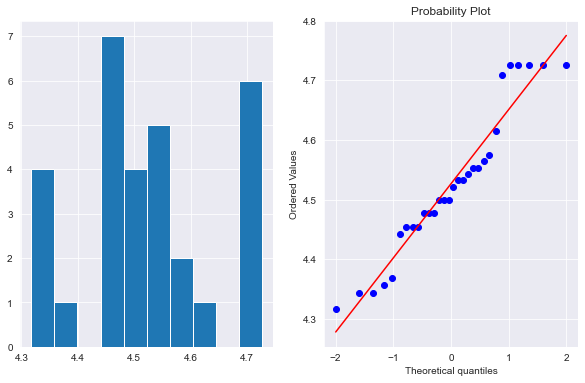

In [37]:
# log transformation
dataset.E = np.log(dataset.E)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.E.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.E,dist='norm',plot=pylab)
plt.show()

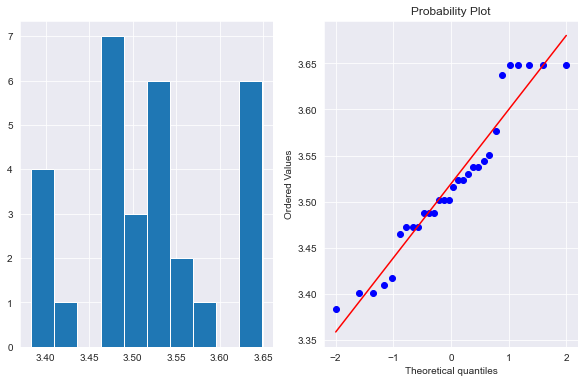

In [38]:
# exponential transformation
dataset.E=dataset.E**(1/1.2)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.E.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.E,dist='norm',plot=pylab)
plt.show()

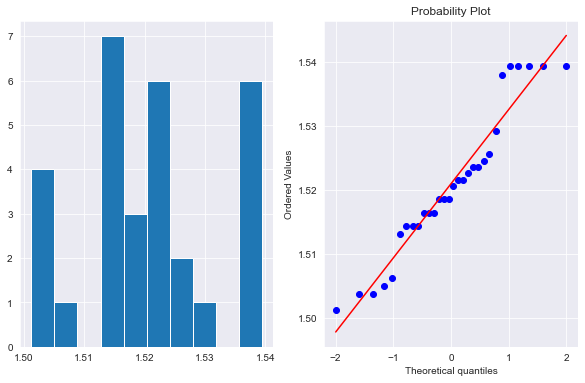

In [39]:
#cuberoot transformation
dataset.E=dataset.E**(1/3)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
dataset.E.hist()
plt.subplot(1,2,2)
stat.probplot(dataset.E,dist='norm',plot=pylab)
plt.show()

In [40]:
# checking skewness after applying transformations
dataset[continuous_var].skew()

W      0.047089
R      0.045807
AB     0.183437
H     -0.628554
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
SV     0.119223
E      0.244969
dtype: float64

Treated the skewness in the dataset to its maximum extent

#### Scaling 

In [41]:
dataset.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,0.182238,5575,-7.311218,300,42,139,383,973,104,641,601,3.73,2,8.0,4.025352,1.516487
1,83,0.183336,5467,-7.207119,277,44,156,439,1264,70,700,653,4.07,2,12.0,3.806662,1.514320
2,81,0.184451,5439,-7.240650,303,29,141,533,1157,86,640,584,3.67,11,10.0,3.637586,1.506247
3,76,0.186540,5533,-7.230563,260,27,136,404,1231,68,701,643,3.98,7,9.0,3.610918,1.529309
4,74,0.183620,5605,-7.323171,289,49,151,455,1259,83,803,746,4.64,7,12.0,3.555348,1.514320


Since the dataset has columns with different range values we will have to scale the features.

In [42]:
# selecting the features to scale
feature_scale = [var for var in dataset.columns if var not in ['W']]

#importing standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset[feature_scale])
scaled = scaler.transform(dataset[feature_scale])
scaled

array([[-0.78161927,  0.84773126, -1.64937148,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.84415269,  1.59204361,
        -0.39942429],
       [-0.24849151, -0.71109353,  0.98166351,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.22214544,  0.34328293,
        -0.59099434],
       [ 0.29280528, -1.1152333 ,  0.13419753,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.31100362, -0.62217797,
        -1.30470499],
       [ 1.30679752,  0.24152162,  0.38912704, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.57757816, -0.77445919,
         0.73407162],
       [-0.11082203,  1.28073815, -1

In [43]:
#creating a new dataframe of the scaled features
df = pd.concat([dataset['W'].reset_index(drop=True),pd.DataFrame(scaled,columns=feature_scale)],axis=1)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,-0.781619,0.847731,-1.649371,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.844153,1.592044,-0.399424
1,83,-0.248492,-0.711094,0.981664,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.222145,0.343283,-0.590994
2,81,0.292805,-1.115233,0.134198,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.311004,-0.622178,-1.304705
3,76,1.306798,0.241522,0.389127,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.577578,-0.774459,0.734072
4,74,-0.110822,1.280738,-1.951457,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.222145,-1.091775,-0.590994


In [57]:
#Dropping ERA and RA since The features corelated to each other are (ER,RA),(ERA,RA),(ERA,ER) to remove multicolinearity  
df.drop(['ERA','RA'],axis=1,inplace=True)

##### Splitting the variables into independent and dependent variables

In [58]:
x = df.drop(['W'],axis=1)
y = df.W

In [59]:
x.shape,y.shape

((30, 14), (30,))

### Feature Selection

- Will be selecting the best features for better prediction

In [60]:
# importing lasso model and feature selection 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#intialising feature selection 
sel_feature = SelectFromModel(Lasso(alpha=0.5,random_state=0))
sel_feature.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.5, random_state=0))

In [61]:
# checking the features selection support
sel_feature.get_support()

array([ True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False])

In [62]:
# checking selected features
selected_feat = x.columns[(sel_feature.get_support())]
selected_feat

Index(['R', 'ER', 'CG', 'SHO', 'SV'], dtype='object')

In [63]:
# making chnges in dataframe and selecting the important features
x = x[selected_feat]
x.head()

,R,ER,CG,SHO,SV
0,-0.781619,-0.505110,-0.539806,-0.844153,1.592044
1,-0.248492,0.248930,-0.539806,0.222145,0.343283
2,0.292805,-0.751623,2.772641,-0.311004,-0.622178
3,1.306798,0.103922,1.300442,-0.577578,-0.774459
4,-0.110822,1.597501,1.300442,0.222145,-1.091775


### Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [65]:
### train/ test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [66]:
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [67]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("Lasso Regressor",lasso),
          ("Ridge Regressor",ridge),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB)]

In [68]:
# loop for model training, prediction and evaluation
train_scores=[]
test_scores=[]
Model=[]
for name, model in models:
    print("*****",name,"*****")
    model.fit(xtrain,ytrain)
    print("\n",model)
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    
    train_acc = r2_score(ytrain,train_pred)
    test_acc = r2_score(ytest,test_pred)
    print('Train R2_score',train_acc)
    print('Test R2_score',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    Model.append(name)
    print("******Train Errors******")
    print('MAE',mean_absolute_error(ytrain,train_pred))
    print('MSE',mean_squared_error(ytrain,train_pred))
    print('RMSE',np.sqrt(mean_squared_error(ytrain,train_pred)))
    print("******Test Errors******")
    print('MAE',mean_absolute_error(ytest,test_pred))
    print('MSE',mean_squared_error(ytest,test_pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,test_pred)),"\n")

***** Linear Regression  *****

 LinearRegression()
Train R2_score 0.9293745594236273
Test R2_score 0.8250186193339767
******Train Errors******
MAE 2.312724310930732
MSE 8.165646177115846
RMSE 2.8575594791912637
******Test Errors******
MAE 3.283202209125343
MSE 14.404640077543746
RMSE 3.7953445268570474 

***** Lasso Regressor *****

 Lasso()
Train R2_score 0.8871952908972452
Test R2_score 0.8746962331247956
******Train Errors******
MAE 3.05854661726897
MSE 13.04237303340422
RMSE 3.611422577517649
******Test Errors******
MAE 2.5888873674876924
MSE 10.315129845973622
RMSE 3.2117175850273045 

***** Ridge Regressor *****

 Ridge()
Train R2_score 0.9279658798860735
Test R2_score 0.8572647769183075
******Train Errors******
MAE 2.314313669003872
MSE 8.328516363648264
RMSE 2.885916901722616
******Test Errors******
MAE 3.0747313675513164
MSE 11.750104537144757
RMSE 3.427842548476338 

***** K Nearest Neighbor Regressor  *****

 KNeighborsRegressor()
Train R2_score 0.7170840197693574
Test R2_s

In [69]:
crossval=[]
for name,model in models:
    print('*****',name,'*****')
    cross_val=cross_val_score(model,x,y,scoring='r2',cv=5).mean()
    print(cross_val)
    crossval.append(cross_val)

***** Linear Regression  *****
0.6459244406991989
***** Lasso Regressor *****
0.5876020311145947
***** Ridge Regressor *****
0.6528208878958935
***** K Nearest Neighbor Regressor  *****
-0.12173372582694961
***** Support Vector Regressor  *****
-0.2488649017254721
***** Decision Tree Regressor  *****
-1.4235179333259778
***** Random forest Regressor  *****
-0.36979907515982074
***** AdaBoost Regressor  *****
-0.3150272187478749
***** Gradient Boosting Regressor  *****
-0.5060245121364872


In [70]:
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train r2 score']=train_scores
evaluate['Test r2 score']=test_scores
evaluate['Cross val score'] = crossval

evaluate

,Model,Train r2 score,Test r2 score,Cross val score
0,Linear Regression,0.929375,0.825019,0.645924
1,Lasso Regressor,0.887195,0.874696,0.587602
2,Ridge Regressor,0.927966,0.857265,0.652821
3,K Nearest Neighbor Regressor,0.717084,0.824265,-0.121734
4,Support Vector Regressor,0.302653,0.265051,-0.248865
5,Decision Tree Regressor,1.000000,0.569436,-1.423518
6,Random forest Regressor,0.929720,0.786753,-0.369799
7,AdaBoost Regressor,0.980848,0.676097,-0.315027
8,Gradient Boosting Regressor,0.999997,0.690809,-0.506025


From the above data Frame we can see that there is overfitting problems so will be picking up Ridge regressor as the best model since it is giving the best train and test accuracy and the best cross validation score as well, and will be further tuning to get best results.

### Hyperparameter Tuning

In [81]:
# grid parameters to search
param_grid = {'alpha':[0.01,0.05,0.1,0.5,1.0,1.5,2.0],
             'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
             }
# using randomized search cv for grid search to find best parameters 
grid_search = GridSearchCV(ridge,param_grid,cv=5,verbose=5)
grid_search.fit(xtrain,ytrain)
# best parameters 
grid_search.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ...........alpha=0.01, solver=auto;, score=0.648 total time=   0.0s
[CV 2/5] END ...........alpha=0.01, solver=auto;, score=0.973 total time=   0.0s
[CV 3/5] END ...........alpha=0.01, solver=auto;, score=0.681 total time=   0.0s
[CV 4/5] END ...........alpha=0.01, solver=auto;, score=0.888 total time=   0.0s
[CV 5/5] END ...........alpha=0.01, solver=auto;, score=0.685 total time=   0.0s
[CV 1/5] END ............alpha=0.01, solver=svd;, score=0.648 total time=   0.0s
[CV 2/5] END ............alpha=0.01, solver=svd;, score=0.973 total time=   0.0s
[CV 3/5] END ............alpha=0.01, solver=svd;, score=0.681 total time=   0.0s
[CV 4/5] END ............alpha=0.01, solver=svd;, score=0.888 total time=   0.0s
[CV 5/5] END ............alpha=0.01, solver=svd;, score=0.685 total time=   0.0s
[CV 1/5] END .......alpha=0.01, solver=cholesky;, score=0.648 total time=   0.0s
[CV 2/5] END .......alpha=0.01, solver=cholesky

[CV 4/5] END ........alpha=0.5, solver=cholesky;, score=0.874 total time=   0.0s
[CV 5/5] END ........alpha=0.5, solver=cholesky;, score=0.680 total time=   0.0s
[CV 1/5] END ............alpha=0.5, solver=lsqr;, score=0.701 total time=   0.0s
[CV 2/5] END ............alpha=0.5, solver=lsqr;, score=0.982 total time=   0.0s
[CV 3/5] END ............alpha=0.5, solver=lsqr;, score=0.726 total time=   0.0s
[CV 4/5] END ............alpha=0.5, solver=lsqr;, score=0.874 total time=   0.0s
[CV 5/5] END ............alpha=0.5, solver=lsqr;, score=0.680 total time=   0.0s
[CV 1/5] END .......alpha=0.5, solver=sparse_cg;, score=0.701 total time=   0.0s
[CV 2/5] END .......alpha=0.5, solver=sparse_cg;, score=0.982 total time=   0.0s
[CV 3/5] END .......alpha=0.5, solver=sparse_cg;, score=0.726 total time=   0.0s
[CV 4/5] END .......alpha=0.5, solver=sparse_cg;, score=0.874 total time=   0.0s
[CV 5/5] END .......alpha=0.5, solver=sparse_cg;, score=0.680 total time=   0.0s
[CV 1/5] END .............al

[CV 1/5] END ............alpha=2.0, solver=lsqr;, score=0.755 total time=   0.0s
[CV 2/5] END ............alpha=2.0, solver=lsqr;, score=0.994 total time=   0.0s
[CV 3/5] END ............alpha=2.0, solver=lsqr;, score=0.771 total time=   0.0s
[CV 4/5] END ............alpha=2.0, solver=lsqr;, score=0.857 total time=   0.0s
[CV 5/5] END ............alpha=2.0, solver=lsqr;, score=0.642 total time=   0.0s
[CV 1/5] END .......alpha=2.0, solver=sparse_cg;, score=0.755 total time=   0.0s
[CV 2/5] END .......alpha=2.0, solver=sparse_cg;, score=0.994 total time=   0.0s
[CV 3/5] END .......alpha=2.0, solver=sparse_cg;, score=0.771 total time=   0.0s
[CV 4/5] END .......alpha=2.0, solver=sparse_cg;, score=0.857 total time=   0.0s
[CV 5/5] END .......alpha=2.0, solver=sparse_cg;, score=0.642 total time=   0.0s
[CV 1/5] END .............alpha=2.0, solver=sag;, score=0.755 total time=   0.0s
[CV 2/5] END .............alpha=2.0, solver=sag;, score=0.994 total time=   0.0s
[CV 3/5] END .............al

{'alpha': 1.5, 'solver': 'saga'}

#### Tuning the model

In [79]:
tuned_model = Ridge(solver='saga',alpha=1.5)
tuned_model.fit(xtrain,ytrain)
tuned_pred = tuned_model.predict(xtest)
print('R2_score',r2_score(ytest,tuned_pred))

R2_score 0.8690212345708791


In [80]:
cross_val=cross_val_score(tuned_model,x,y,scoring='r2',cv=5).mean()
print(cross_val)

0.6542129776019017


### Saving the model

In [76]:
import joblib 
joblib.dump(tuned_model,"Baseball_model.pkl")

['Baseball_model.pkl']